In [ ]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

images = pd.DataFrame()

data_path = r"data"
imaging_path = os.path.join(data_path, r"imaging_subset")
filenames = os.listdir(imaging_path)
depths = pd.read_csv(os.path.join(data_path, "depths.csv"))

for i in filenames:
    img = cv2.imread(os.path.join(imaging_path, i), 0)
    try:
        depth = depths[depths["Filenames"].str.lower() == i.lower()][
            "Depth from lung surface (in micrometers) where image was acquired"
        ].values[0]
        # some files are named with SK658 and some with Sk658
    except IndexError:
        print(f"couldn't find depth for file {i}")
        continue
    images = pd.concat(
        [images, pd.DataFrame([{"filename": i, "image": img, "depth": depth}])],
        ignore_index=True,
    )

print(images.shape)

(20, 3)


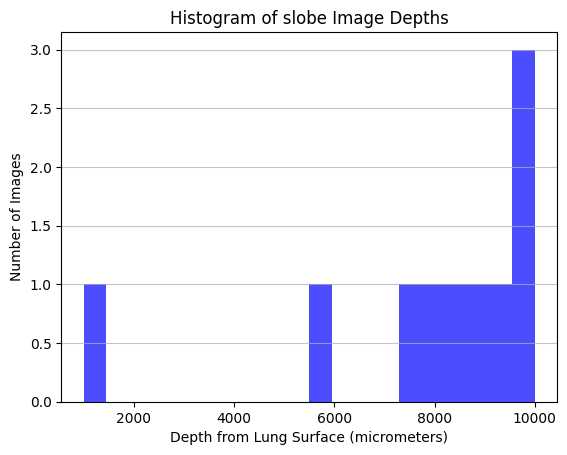

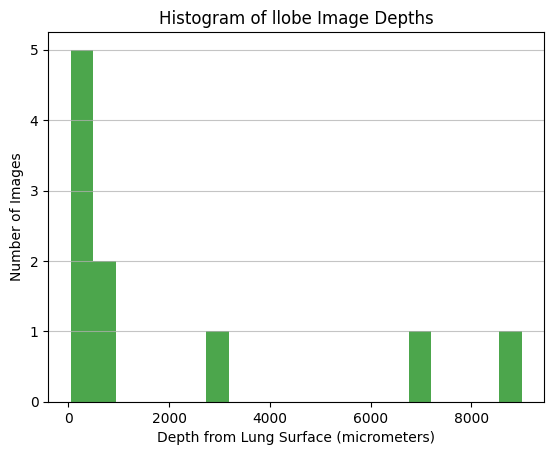

In [7]:
# plot the depths of all images of both groups

slobe_images = images[images['filename'].str.contains('slobe', case=False)]
llobe_images = images[images['filename'].str.contains('llobe', case=False)]

plt.hist(slobe_images['depth'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of slobe Image Depths')
plt.xlabel('Depth from Lung Surface (micrometers)')
plt.ylabel('Number of Images')
plt.grid(axis='y', alpha=0.75)
plt.show()
plt.close('all')


plt.hist(llobe_images['depth'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of llobe Image Depths')
plt.xlabel('Depth from Lung Surface (micrometers)')
plt.ylabel('Number of Images')
plt.grid(axis='y', alpha=0.75)
plt.show()
plt.close('all')